## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

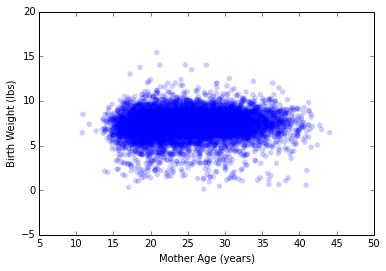

In [24]:
import nsfg
import thinkplot
import thinkstats2
import numpy as np

df = nsfg.ReadFemPreg()
df = df.dropna(subset=['agepreg', 'totalwgt_lb'])
mother_age = df.agepreg
birth_weight = df.totalwgt_lb

#Scatter Plot with transparency
thinkplot.Scatter(mother_age, birth_weight, alpha=0.2)
thinkplot.Show(xlabel='Mother Age (years)',
               ylabel='Birth Weight (lbs)')

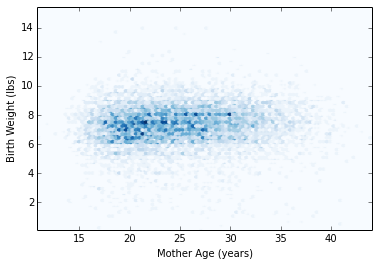

In [25]:
#Hexbin Plot
thinkplot.HexBin(mother_age, birth_weight)
thinkplot.Show(xlabel='Mother Age (years)',
               ylabel='Birth Weight (lbs)')

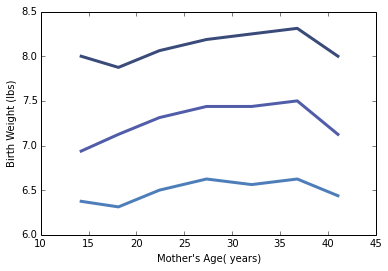

In [32]:
#Percentile of Birth Weight against Mother's age
bins = np.arange(5, 55, 5)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)

ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    thinkplot.Plot(ages, weights, label=labels)

thinkplot.Show(xlabel="Mother's Age( years)",
               ylabel="Birth Weight (lbs)")

In [34]:
#Calculating Pearson's Correlation
import math

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    meanx, varx = np.mean(xs), np.var(xs)
    meany, vary = np.mean(ys), np.var(ys)
    
    
    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)
    return corr

print Corr(mother_age, birth_weight)

0.0688339703541


In [36]:
#Calculation Spearman's rank correlation
import pandas

def SpearmanCorr(xs, ys):
    xranks = pandas.Series(xs).rank()
    yranks = pandas.Series(ys).rank()
    return Corr(xranks, yranks)

print SpearmanCorr(mother_age, birth_weight)

0.0946100410966


There is a large difference between the two correlations, meaning that the relationship is non-linear and/or contain outliers. Usually, Spearman's correlation is more reliable.

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [4]:
df = nsfg.ReadFemPreg()
df.columns

Index([         u'caseid',        u'pregordr',       u'howpreg_n',
             u'howpreg_p',        u'moscurrp',        u'nowprgdk',
              u'pregend1',        u'pregend2',        u'nbrnaliv',
              u'multbrth',
       ...
            u'laborfor_i',      u'religion_i',         u'metro_i',
               u'basewgt', u'adj_mod_basewgt',        u'finalwgt',
                u'secu_p',            u'sest',         u'cmintvw',
           u'totalwgt_lb'],
      dtype='object', length=244)

In [5]:
totalwgt_data = df.totalwgt_lb
age_data = df.agepreg

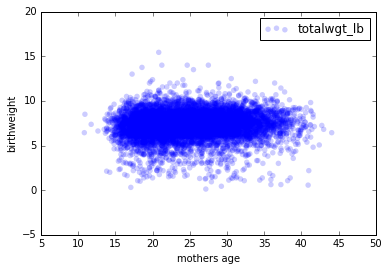

In [9]:
thinkplot.Scatter( age_data, totalwgt_data)
thinkplot.Show(xlabel = 'mothers age', ylabel = 'birthweight')

In [17]:
df = df.dropna(subset = ['agepreg', 'totalwgt_lb'])
bins = np.arange(5, 50, 5)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)

(2, 58)
(3, 1852)
(4, 2962)
(5, 2336)
(6, 1393)
(7, 401)
(8, 36)


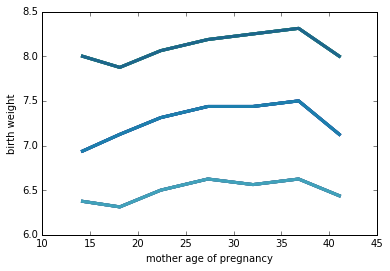

In [48]:
for i, group in groups: 
    print (i, len(group))
    
    ages= [group.agepreg.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

    for percent in [75, 50, 25]: 
        birthweights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        
        thinkplot.Plot(ages, birthweights); 
        

thinkplot.Show(xlabel = 'mother age of pregnancy', ylabel = 'birth weight')

In [38]:
thinkstats2.Corr(df.agepreg, df.totalwgt_lb)

0.068833970354109028

In [40]:
thinkstats2.SpearmanCorr(df.agepreg, df.totalwgt_lb)

0.094610041096582262

Both the Pearson's correlation and Spearman Correlation are small. These values proove that there is very little correlation or strength between the two variables. Looking at the percentile plot, the lines are wiggly and hardly increase. Therefore, the ages of the mothers at pregnancy have very little effect on the weight of their children at birth. 

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [2]:
import nsfg
import math
import thinkstats2
import thinkplot
import numpy as np
df = nsfg.ReadFemPreg()

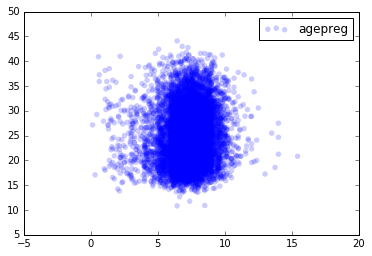

In [3]:
weights, ages = df.totalwgt_lb, df.agepreg
thinkplot.Scatter(weights, ages)
thinkplot.Show()

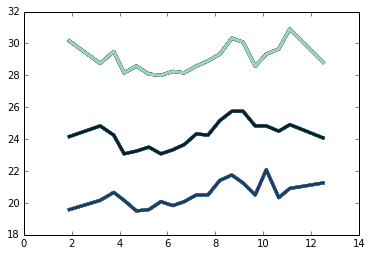

In [4]:
df = df.dropna(subset=['totalwgt_lb', 'agepreg'])
bins = np.arange(3, 12, .5)
indices = np.digitize(df.totalwgt_lb, bins)
groups = df.groupby(indices)
for i, group in groups:
    weights = [group.totalwgt_lb.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.agepreg) for i, group in groups]
    for percent in [75, 50, 25]:
        ages = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(weights, ages, label=label)

In [5]:
#Pearson's
#z = (x-mean)/standard_dev
weights, ages = df.totalwgt_lb, df.agepreg
thinkstats2.Corr(weights, ages), thinkstats2.SpearmanCorr(weights, ages)

(0.068833970354109028, 0.094610041096582262)

There does not seem to be practically any correlation. What little correlation there is is positive, but still.

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

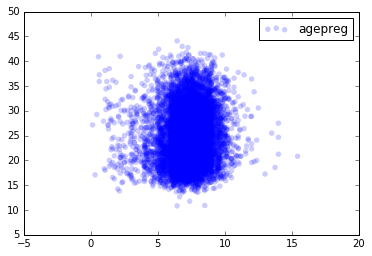

Percentiles of Total Birth Weight vs Age of Mother
Pearson Correlation: 0.0688339703541
Spearman Correlation: 0.0946100410966


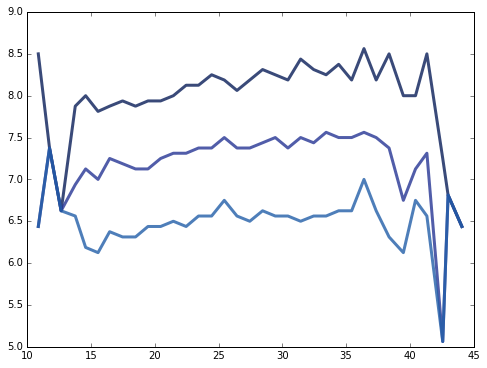

In [27]:
import nsfg
import thinkplot 
import numpy as np
import pandas as pd
import thinkstats2
%matplotlib inline
def CleanFemPreg(df):
    df.agepreg /= 100
    
    na_vals = [97,98,99]
    
    df.birthwgt_lb[df.birthwgt_lb > 20] = np.nan


initial = nsfg.ReadFemPreg()
preg = initial.dropna(subset=['agepreg','totalwgt_lb'])

b_wgt = preg.totalwgt_lb
m_age = preg.agepreg


thinkplot.Scatter(b_wgt, m_age,alpha=0.2)
thinkplot.Show()

bins = np.arange(5,50,1)
indices = np.digitize(preg.agepreg,bins)
groups = preg.groupby(indices)

m_age_2 = [group.agepreg.mean() for i, group in groups]
pregs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
print "Percentiles of Total Birth Weight vs Age of Mother"
for percent in [75,50,25]:
    b_wgt_prcnt = [cdf.Percentile(percent) for cdf in pregs]
    label = '%dth' %percent
    thinkplot.Plot(m_age_2, b_wgt_prcnt, label = label)

print 'Pearson Correlation: ' + str(thinkstats2.Corr(b_wgt,m_age))

print 'Spearman Correlation: ' + str(thinkstats2.SpearmanCorr(b_wgt,m_age))

<p> From the two graphs and the correlations we can see that the relationships between age and weight percent is 
not very linear in the majority of ages. From the scatter plot there seems to be very little correlation which is also shown by the near 0 value of Pearson's Correlation. From the graphs and Spearman's Correlation which is slightly higher which indicates that Pearson's Correlation is underestimating the data due to the non linearity of the relationship. In addition there are some outliers that are pulling the distributions. 
</p>

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [52]:
import nsfg
df = nsfg.ReadFemPreg()

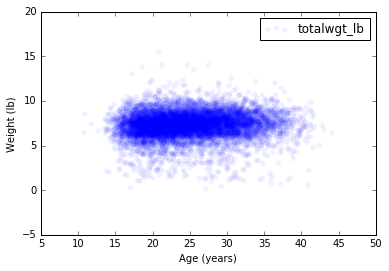

In [57]:
df = df.dropna(subset=['totalwgt_lb', 'agepreg'])
birth_wgt = df.totalwgt_lb
mother_age = df.agepreg

thinkplot.Scatter(mother_age, birth_wgt, alpha=0.06)
thinkplot.Show(ylabel='Weight (lb)',
               xlabel='Age (years)')

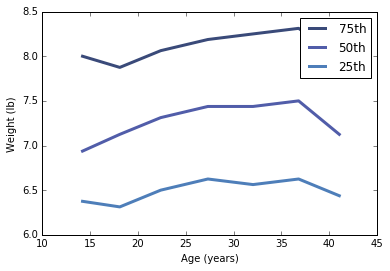

In [58]:
bins = np.arange(0, 50, 5)
indicies = np.digitize(df.agepreg, bins)
groups = df.groupby(indicies)

ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)
    
thinkplot.Show(ylabel='Weight (lb)',
               xlabel='Age (years)')

In [60]:
corr = thinkstats2.Corr(mother_age, birth_wgt)
print "Pearson's correlation: %f" % corr

Pearson's correlation: 0.068834


In [61]:
corr = thinkstats2.SpearmanCorr(mother_age, birth_wgt)
print "Spearman's correlation: %f" % corr

Spearman's correlation: 0.094610


The mother's age at pregnancy outcome and the baby's weight do not have a strong correlation. There is a weak trend showing a positive correlation between the two variables. Therefore, it is slightly more likely that older women will give birth to heavier babies.

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [36]:
import thinkstats2
import thinkplot
import numpy as np
import nsfg

raw_df = nsfg.ReadFemPreg().dropna(subset = ['totalwgt_lb','agepreg'] )
weights = raw_df.totalwgt_lb
ages = raw_df.agepreg

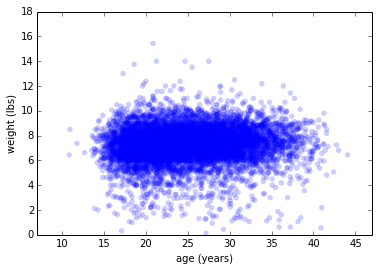

In [37]:
thinkplot.Scatter(ages, weights)
thinkplot.Show(xlabel='age (years)', ylabel='weight (lbs)', axis=[7,47,0,18])

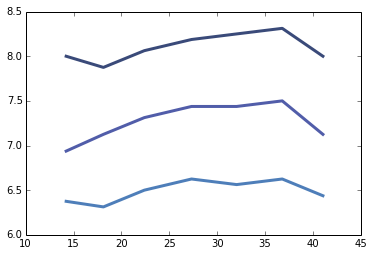

In [38]:
df = raw_df.dropna(subset=['totalwgt_lb', 'agepreg'])
bins = np.arange(10, 45, 5)
indices = np.digitize(df.agepreg, bins)

groups = df.groupby(indices)
age = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

for percent in [75, 50, 25]:
    weight = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(age, weight, label=label)

# Correlations

In [39]:
print ["Pearson's Correlation is: " + str(thinkstats2.Corr(ages, weights))]
print ["Spearman's Correlation is: " + str(thinkstats2.SpearmanCorr(ages, weights))]

["Pearson's Correlation is: 0.0688339703541"]
["Spearman's Correlation is: 0.0946100410966"]


Since Spearman's correlation has a larger value than Pearson's, we know that age and weight must not be a purely linear relationship. However, because the values are both less than .1, the correlation suggests that the two variables are not that strongly correlated with each other.

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

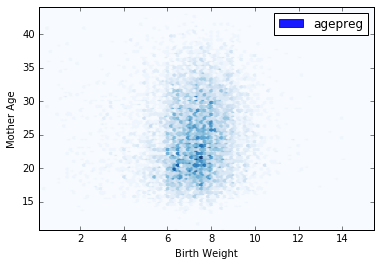

In [29]:
thinkplot.HexBin(df.totalwgt_lb, df.agepreg, alpha=0.9)
thinkplot.Show(xlabel='Birth Weight', ylabel='Mother Age')

As it can be seen, there doesn't appear to be very much of a link between mother's age and birth weight. It is shown that the ages of the mothers vary from roughly 15 to 40, and within that range there are mothers with birth weights of a range between 2 to 11 pounds, making it dififcult to make much of a connection. 

In [30]:
df = df.dropna(subset=['totalwgt_lb', 'agepreg'])
bins = np.arange(0, 40, 5)
indices = np.digitize(df.totalwgt_lb, bins)
groups = df.groupby(indices)

(1, 425)
(2, 8438)
(3, 174)
(4, 1)


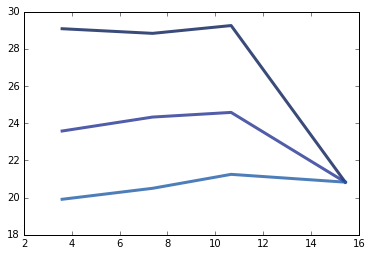

In [31]:
for i, group in groups:
    print(i, len(group))
    weight = [group.totalwgt_lb.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.agepreg) for i, group in groups]
    
for percent in [75, 50, 25]:
    ages = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(weight, ages, label=label)

In [32]:
thinkstats2.Corr(df.totalwgt_lb, df.agepreg)

0.068833970354109028

In [33]:
thinkstats2.SpearmanCorr(df.totalwgt_lb, df.agepreg)

0.094610041096582262

These two calculations are pretty far apart in value; for Pearson's correlation, there is not a large chance that the relationship is linear. For Spearman's correlation, there is an improvement due to the filtering of outliers, suggesting that there was either a large number of outliers or the value of the outliers differed greatly. 

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [2]:
import nsfg
import thinkplot
import thinkstats2
df = nsfg.ReadFemPreg()

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = df[(df.agepreg >= 0) & (df.agepreg < 45)].dropna(subset=['agepreg', 'totalwgt_lb'])

In [5]:
weight = df.totalwgt_lb
m_age = df.agepreg

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


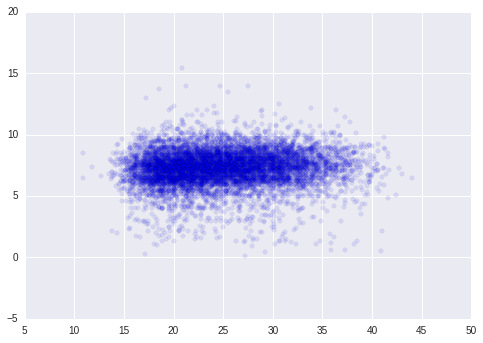

In [6]:
plt.scatter(m_age, weight, alpha=0.1)
# plt.hexbin(m_age, weight, gridsize=30, cmap=plt.cm.summer)
# plt.xlabel("Age"); plt.ylabel('Birth Weight')

In [7]:
bins = np.arange(10, 45, 2.5)
indices = np.digitize(m_age, bins)
groups = df.groupby(indices)
ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

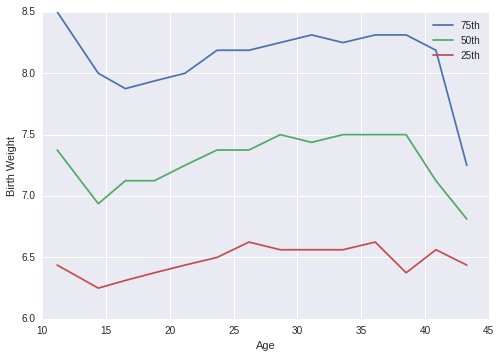

In [8]:
labels = []
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    labels.append('%dth' % percent)
    plt.plot(ages, weights)
plt.legend(labels)
plt.xlabel('Age')
plt.ylabel('Birth Weight')

In [9]:
print 'Pearson: ' + str(thinkstats2.Corr(m_age, weight))
print 'Spearman: ' + str(thinkstats2.SpearmanCorr(m_age, weight))

Pearson: 0.0688339703541
Spearman: 0.0946100410966


There seems to be a very lose relationship, one that is possibly not linear. Generally, the older the mother, the heavier her baby. However, it is possible that at a certain point, if a mother is very old, the child is likely to be very light. This data is also being affected heavily by an outlier on the right end of the graph, where an old mother gave birth to a very light child. Age is a better predictor of rank than it is absolute weight.

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

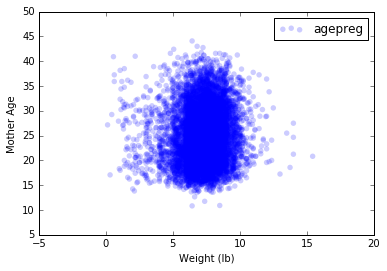

Pearson's correlation:  0.0688339703541
Spearman's rank:  0.0946100410966


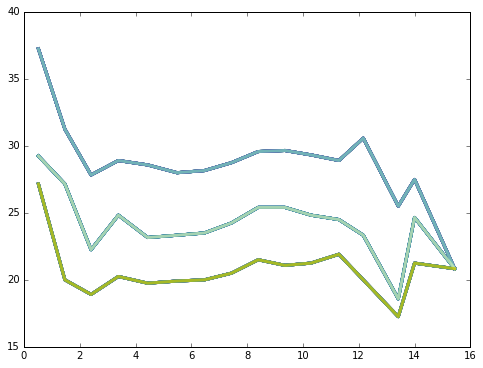

In [14]:
import nsfg
import thinkplot
import numpy as np
import thinkstats2

df = nsfg.ReadFemPreg()
thinkplot.Scatter(df.totalwgt_lb, df.agepreg)
thinkplot.Show(xlabel='Weight (lb)',
               ylabel='Mother Age',
               alpha=0.2)

df = df.dropna(subset=['totalwgt_lb','agepreg'])
bins = np.arange(0,20,1)
indices = np.digitize(df.totalwgt_lb,bins)
groups = df.groupby(indices)

for i, group in groups:
#     print(i, len(group))
    
    weights = [group.totalwgt_lb.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.agepreg) for i, group in groups]
    
    for percent in [75, 50, 25]:
        ages = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(weights,ages,label=label)
        
print "Pearson's correlation: ", thinkstats2.Corr(df.totalwgt_lb, df.agepreg)
print "Spearman's rank: ", thinkstats2.SpearmanCorr(df.totalwgt_lb, df.agepreg)

'''
I would describe this data as having a very loose correlation. Looking at the scatter plot 
and given the low correlaction and rank values, this description is supported in several ways.
''' 



## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

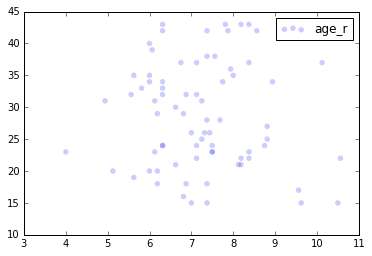

In [16]:
%matplotlib inline
import thinkstats2
import thinkplot
import nsfg
import chap01soln
df = nsfg.ReadFemPreg()
resp = chap01soln.ReadFemResp()
birth_weight = df.totalwgt_lb[0:100]
mothers_age = resp.age_r[0:100]

thinkplot.Scatter(birth_weight, mothers_age)
thinkplot.Show()


In [17]:
import math
import numpy as np
import pandas as pd

preg = df.dropna(subset = ['totalwgt_lb', 'agepreg'])
weight = preg.totalwgt_lb
age = preg.agepreg


#Covariance

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov


#Pearson's Correlation
def Corr(xs, ys):
    #xs_filtered = xs[(~xs.isnull()) & (~ys.isnull())]
    #ys_filtered = ys[(~xs.isnull()) & (~ys.isnull())]
    
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    meanx, varx = np.mean(xs), np.var(xs)
    meany, vary = np.mean(ys), np.var(ys)
    
    #use covariance  function to find Pearson's Correlation
    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)
    return corr
 

    
Corr(age, weight)



0.06883397035410907

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

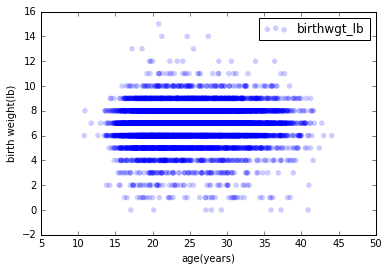

In [30]:
import nsfg
import thinkplot


df = nsfg.ReadFemPreg()
df = df.dropna(subset = ['birthwgt_lb', 'agepreg'])
age = df.agepreg
weight = df.birthwgt_lb
thinkplot.Scatter(age, weight)
thinkplot.Show(xlabel = 'age(years)', ylabel = 'birth weight(lb)')


In [31]:
print age

0        33.16
1        39.25
2        14.33
3        17.83
4        18.33
5        27.00
6        28.83
7        30.16
8        28.08
9        32.33
10       25.75
11       23.00
12       24.58
15       28.33
16       30.33
17       18.91
19       27.91
20       30.58
21       18.91
23       22.25
24       25.75
25       29.41
26       32.66
27       18.83
28       20.83
29       21.66
31       33.08
32       26.25
33       27.91
34       37.25
         ...  
13548    23.91
13551    25.25
13552    26.25
13553    27.25
13554    28.91
13555    17.16
13556    21.16
13557    26.33
13559    23.58
13560    26.91
13561    28.16
13562    18.25
13563    21.08
13564    23.33
13565    20.25
13566    32.66
13569    18.00
13570    24.41
13571    27.83
13572    33.16
13573    22.25
13574    24.41
13576    31.66
13578    24.00
13579    25.91
13581    30.66
13584    26.91
13588    17.91
13591    21.58
13592    21.58
Name: agepreg, dtype: float64


In [32]:
print weight

0         8
1         7
2         9
3         7
4         6
5         8
6         9
7         8
8         7
9         6
10        7
11        7
12        4
15        7
16        7
17        6
19        8
20        8
21        5
23        6
24        7
25        6
26        8
27        7
28        6
29        7
31        8
32        7
33        7
34        7
         ..
13548    10
13551     5
13552     7
13553     7
13554     6
13555     6
13556     7
13557     6
13559     7
13560     7
13561     6
13562     8
13563     7
13564     7
13565     8
13566     7
13569     5
13570     6
13571     6
13572     5
13573     6
13574     6
13576     6
13578     6
13579     7
13581     6
13584     6
13588     6
13591     7
13592     7
Name: birthwgt_lb, dtype: float64


In [33]:
import thinkstats2
print thinkstats2.Corr(age, weight)

0.0689622017115


In [34]:
print thinkstats2.SpearmanCorr(age, weight)

0.0945629753464


In [35]:
print "The age of mother and the baby birth weight are very unrelated variables"

The age of mother and the baby birth weight are very unrelated variables


## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [2]:
import nsfg

df = nsfg.ReadFemPreg()

After importing the data, I produced a HexBin scatter plot of the babies' birth weights vs. mother's ages at pregnancy outcome.

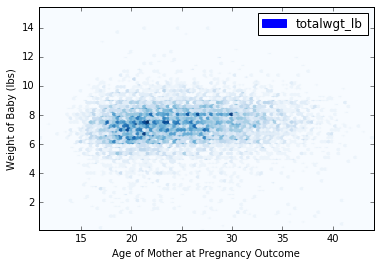

In [9]:
import thinkstats2
import numpy as np
import thinkplot
import math

ages, birthwgts = df['agepreg'], df['totalwgt_lb']

thinkplot.HexBin(ages, birthwgts)
thinkplot.Show(xlabel='Age of Mother at Pregnancy Outcome', \
               ylabel='Weight of Baby (lbs)')

Looking at the scatter plot, it seems as though the correlation is close to 0. The age of the mother seems to have little or no effect on the baby's weight.

In order to determine the range of bins, I look at the mean age of the mothers and the standard deviation and I choose $\pm$2 standard deviations because that includes about 95% of the mothers' ages.

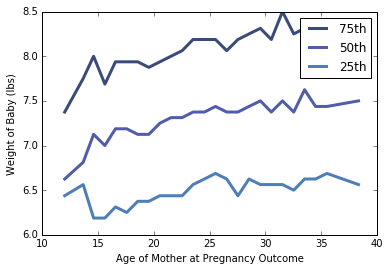

In [4]:
std_ages = np.std(ages)
bins = np.arange(ages.mean()-2*std_ages, ages.mean()+2*std_ages, 1)
indices = np.digitize(ages, bins)
groups = df.groupby(indices)

age_bins = [group['agepreg'].mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group['totalwgt_lb']) for i, group in groups]

for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(age_bins, weights, label=label)
    

thinkplot.Show(xlabel='Age of Mother at Pregnancy Outcome', \
               ylabel='Weight of Baby (lbs)')

In [20]:
birthwgts_no_nan = []
ages_no_nan = []

# Removes both weight and age values if either is not a number
for i in range(len(birthwgts)):
    if not (math.isnan(birthwgts[i]) or math.isnan(ages[i])):
        birthwgts_no_nan.append(birthwgts[i])
        ages_no_nan.append(ages[i])
        
birthwgts_no_nan = np.asarray(birthwgts_no_nan)
ages_no_nan = np.asarray(ages_no_nan)

print 'Pearson\'s Correlation: %.4f' \
        %thinkstats2.Corr(ages_no_nan, birthwgts_no_nan)
print 'Spearman\'s Correlation: %.4f' \
        %thinkstats2.SpearmanCorr(ages_no_nan, birthwgts_no_nan)

Pearson's Correlation: 0.0688
Spearman's Correlation: 0.0946


These variables have such a low correlation that I would deem them to be unrelated.

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

Below is the scatter plot of birth weight vs mother's age.

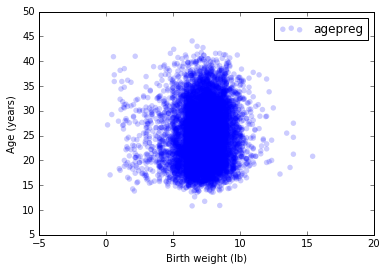

In [2]:
import nsfg
import thinkplot
df = nsfg.ReadFemPreg()

weights = df.totalwgt_lb
agepreg = df.agepreg

thinkplot.Scatter(weights, agepreg)
thinkplot.Show(xlabel='Birth weight (lb)', ylabel='Age (years)')

There does not appear to be a clear relationship between birth weight and mother's age from this scatter plot.

Below is a plot of the percentiles of birth weight vs. mother's age.

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


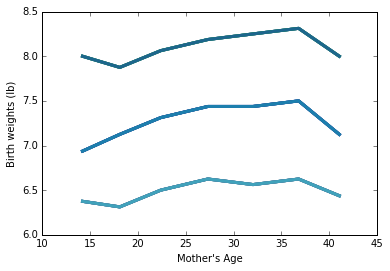

In [3]:
import numpy as np
import thinkstats2

df = df.dropna(subset=['agepreg', 'totalwgt_lb'])
bins = np.arange(5, 50, 5)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)

for i, group in groups:
    ages = [group.agepreg.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
    
    for percent in [75, 50, 25]:
            weights = [cdf.Percentile(percent) for cdf in cdfs]
            label = '%dth' % percent
            thinkplot.Plot(ages, weights)

thinkplot.Show(xlabel="Mother's Age", ylabel='Birth weights (lb)')


In the plot above, the top line is the 75th percentile, the middle line is the 50th percentile, and the last line is the 25th percentile for birth weight. What we see here is that in the 10 bins we created for the mother's age, the birth weight of the baby by percentile can occur at all ages. That is to say, other than the dip after 40 that occurs in all percentiles, the age of the mother does not contribute to the birth weight of the baby as we see a flat line for all three percentiles along the age axis.

Below is the calculated Pearson's correlation.

In [4]:
print thinkstats2.Corr(df.totalwgt_lb, df.agepreg)

0.0688339703541


The Pearson's correlation is very close to 0 which implies that there is no relationship between these variables. However, Pearson's correlation only measures linear relationships so it could be the case that there is a nonlinear relationship. In addition, Pearson's correlation is not robust to the presence of outliers and skewed distributions so this could also be the cause of the calculated correlation being close to 0.

Below is the calculated Spearman's correlation.

In [5]:
print thinkstats2.SpearmanCorr(df.totalwgt_lb, df.agepreg)

0.0946100410966


Spearman's correlation is a value that is also very close to 0 but is 0.03 higher than the Pearson's correlation. Since Spearman's correlation is robust to the presence of outliers and skewed distributions, we could attribute the difference between the correlations to these factors. This value is also close to 0 so it would appear that these variables are not correlated or are only very slightly positively correlated.

Given the calculation of the Pearson's and Spearman's correlations, the percentile plot, and the scatter plot, I do not think there is a relationship between the mother's age and the baby's birth weight.

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

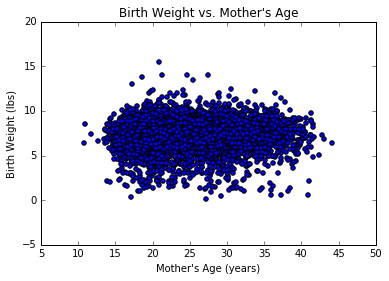

In [44]:
import thinkstats2
import numpy as np
import matplotlib.pyplot as plt
import nsfg
df = nsfg.ReadFemPreg()
df = df.dropna(subset=['agepreg', 'totalwgt_lb'])

plt.scatter(df.agepreg, df.totalwgt_lb)
plt.title("Birth Weight vs. Mother's Age")
plt.xlabel("Mother's Age (years)")
plt.ylabel('Birth Weight (lbs)')

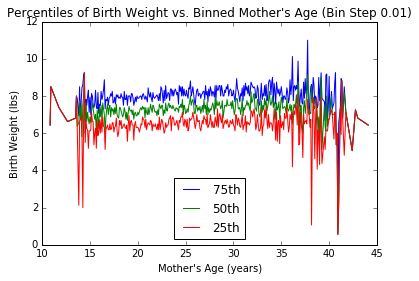

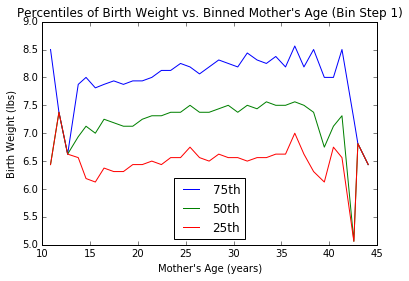

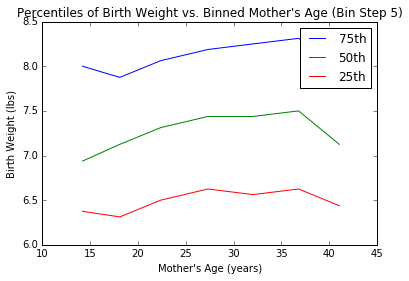

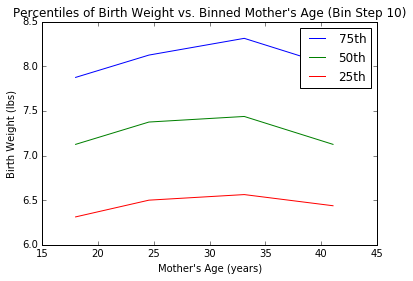

In [45]:
def plotPercentiles(df, bin_step=1):
    """
    Bin mother's age and plot percentiles of birth weight
    """
    bins = np.arange(10, 45, bin_step)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
    labels = []
    plt.figure()
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        plt.plot(ages, weights)
        labels.append('{}th'.format(percent))
    plt.legend(labels, loc=0)
    plt.title("Percentiles of Birth Weight vs. Binned Mother's Age (Bin Step {})".format(bin_step))
    plt.xlabel("Mother's Age (years)")
    plt.ylabel('Birth Weight (lbs)')

plotPercentiles(df, 0.01)  # Ages are recorded to the thousandth, so this is the smallest binning possible
plotPercentiles(df, 1)
plotPercentiles(df, 5)
plotPercentiles(df, 10)

The prompt here didn't mention binning the mother's age, but the example in ThinkStats of plotting percentiles binned the x-axis values and I couldn't figure out a way to plot percentiles without binning.  So, I took this opportunity to explore the effect of bin size on the plots produced.

In [46]:
pearson_corr = thinkstats2.Corr(df.agepreg, df.totalwgt_lb)
spearman_corr = thinkstats2.SpearmanCorr(df.agepreg, df.totalwgt_lb)
print "Pearson's:\t", pearson_corr
print "Spearman's:\t", spearman_corr

Pearson's:	0.0688339703541
Spearman's:	0.0946100410966


Both the Pearson's and Spearman's correlation values are less than 0.1 in magnitude, indicating that mother's age and birth weight are not very correlated.  The scatter and percentile plots verify this conclusion; there is no strong connection between the two variables.

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

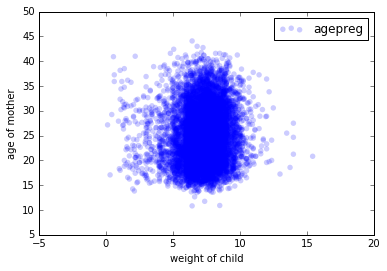

nan
0.0946100410966


In [5]:
import nsfg
import thinkplot
import math
import pandas
import thinkstats2
df = nsfg.ReadFemPreg()

weights = df.totalwgt_lb
ages = df.agepreg

thinkplot.Scatter(weights, ages)
thinkplot.Show(xlabel='weight of child', ylabel='age of mother')


def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx =  np.mean(xs), np.var(xs)
    meany, vary = np.mean(ys), np.var(ys)

    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xs = pandas.Series(xs)
    ys = pandas.Series(ys)
    return xs.corr(ys, method='spearman')

# preg = df.dropna()
# weight = df.totalwgt_lb
# age = df.agepreg

print thinkstats2.Corr(ages, weights) # Corrolation is returning NaN still...
print SpearmanCorr(ages, weights)



## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

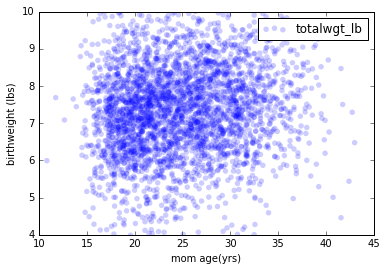

In [8]:
jitWeight = thinkstats2.Jitter(birthweight, 0.5)
thinkplot.Scatter(momAge,jitWeight)
thinkplot.Show(xlabel='mom age(yrs)',
              ylabel ='birthweight (lbs)',
              axis= [10,45,4,10])

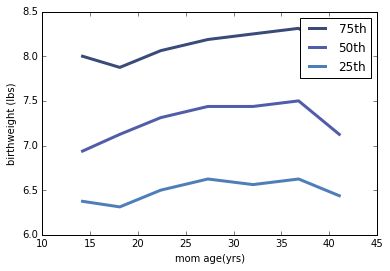

In [9]:
df = df.dropna(subset=['totalwgt_lb','agepreg'])
bins = np.arange(10,50,5)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)

ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

for percent in [75,50,25]:
    weights =[cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)
    
thinkplot.Show(xlabel= 'mom age(yrs)', ylabel='birthweight (lbs)')

In [10]:
df= df.dropna(subset=['totalwgt_lb','agepreg'])

def Cov(xs, ys, meanx=None, meany=None):
    """Covariance function from Thinkstats2 supplemented with Paul's suggedted mask"""
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
        
    cov = np.dot(xs-meanx, ys-meany)/ len(xs)
    return cov

def corr(xs,ys):
    """Thinkstats2 Pearson Correlation provided function"""
    xs =np.asarray(xs)
    ys = np.asarray(ys)
    
    meanx, varx = np.mean(xs), np.var(xs)
    meany,vary=np.mean(ys),np.var(ys)
    
    corr=Cov(xs,ys,meanx,meany)/sqrt(varx*vary)
    return corr

print Cov(df.agepreg, df.totalwgt_lb)
print corr(df.agepreg, df.totalwgt_lb)

0.538335012141
0.0688339703541


## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

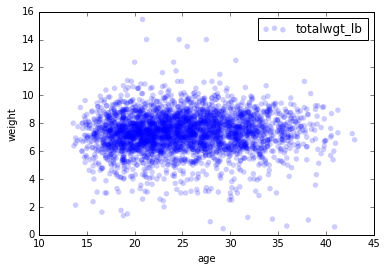

In [52]:
weight_jitter = thinkstats2.Jitter(weight, 0.5)
# don't need jitter for age, no rounding because whole number
thinkplot.Scatter(age, weight)
thinkplot.Show(xlabel = 'age',
               ylabel = 'weight',
               axis = [10, 45, 0, 16])

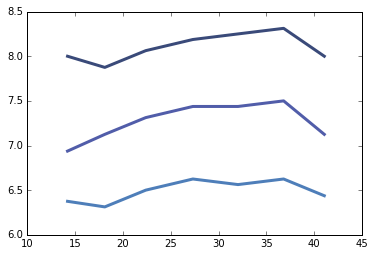

In [53]:
df = df.dropna(subset = ['totalwgt_lb', 'agepreg'])
bins = np.arange(10, 45, 5)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)

ages  = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages, weights, label=label)

In [54]:
print "Pearson correlation,", thinkstats2.Corr(df.totalwgt_lb, df.agepreg)
print "Spearman correlation,", thinkstats2.SpearmanCorr(df.totalwgt_lb, df.agepreg)

Pearson correlation, 0.0688339703541
Spearman correlation, 0.0946100410966


There is some difference between the two correlations, however the difference is less than 0.1, so the difference is quite small.

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

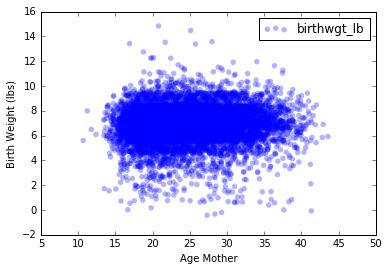

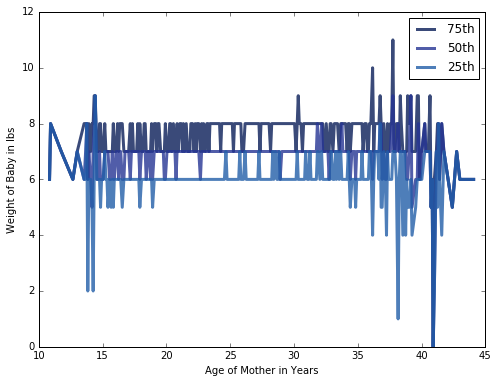

Pearson Corr Age v Weight 0.0689622017115
Spearman Corr Age v Weight 0.0945629753464


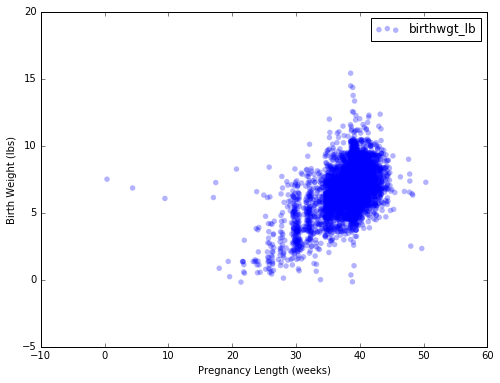

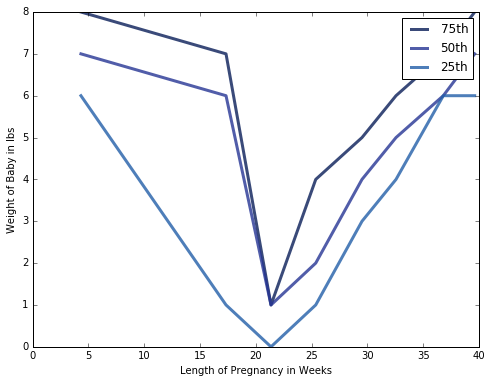

Pearson Corr Length v Weight 0.485165328421
Spearman Corr Length v Weight 0.352799982421


In [81]:
import nsfg
import thinkstats2
import thinkplot 
import numpy as np

df = nsfg.ReadFemPreg()

#introduce jitter to produce more "honest" data representation
age = df.agepreg[df.birthwgt_lb <= 95]
age = thinkstats2.Jitter(age,0.5)
weight = df.birthwgt_lb[df.birthwgt_lb <= 95]
weight = thinkstats2.Jitter(weight,0.5)

#make a scatter plot
thinkplot.Scatter(age,weight,alpha=0.3)
thinkplot.Show(xlabel='Age Mother', ylabel='Birth Weight (lbs)')

#plot percentiles of birthweight versus mother's age
df_sub = df.dropna(subset=['agepreg','birthwgt_lb']) #only apply aggressive dropna to data we care about
age = df_sub.agepreg[df_sub.birthwgt_lb <= 95]
bins = np.arange(5,50,0.1) #bins of a little over a month in time
indices = np.digitize(age,bins)
groups = df_sub.groupby(indices)

ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.birthwgt_lb) for i, group in groups]

for percent in [75,50,25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(ages,weights,label=label)

thinkplot.Show(xlabel='Age of Mother in Years', ylabel='Weight of Baby in lbs')

#Pearson's and Spearman's correlations
pear_corr = thinkstats2.Corr(df_sub.agepreg,df_sub.birthwgt_lb)
print 'Pearson Corr Age v Weight', pear_corr #pretty close to zero, implying little to no correlation
spear_corr = thinkstats2.SpearmanCorr(df_sub.agepreg, df_sub.birthwgt_lb)
print 'Spearman Corr Age v Weight', spear_corr

#I would claim that there is no correlation amongst 
#these variables. I posited that length of the pregnancy would 
#probably be more strongly correlated, which is the case. That info is here:

weeks = df.prglngth[df.birthwgt_lb <= 95]
weeks = thinkstats2.Jitter(weeks,0.5)
weight = df.birthwgt_lb[df.birthwgt_lb <= 95]
weight = thinkstats2.Jitter(weight,0.5)

thinkplot.Scatter(weeks,weight,alpha=0.3)
thinkplot.Show(xlabel='Pregnancy Length (weeks)', ylabel='Birth Weight (lbs)')

df_sub = df.dropna(subset=['prglngth','birthwgt_lb'])
sub_prglngth = df_sub.prglngth[(df_sub.birthwgt_lb <= 95)]
bins = np.arange(15,40,4) #bins of about a month
indices = np.digitize(sub_prglngth,bins)
groups = df_sub.groupby(indices)

weeks = [group.prglngth.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.birthwgt_lb) for i, group in groups]

for percent in [75,50,25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(weeks,weights,label=label)


thinkplot.Show(xlabel='Length of Pregnancy in Weeks', ylabel='Weight of Baby in lbs')

pear_corr = thinkstats2.Corr(sub_prglngth, df_sub.birthwgt_lb)
print 'Pearson Corr Length v Weight', pear_corr #a fairly reasonable correlation
spear_corr = thinkstats2.SpearmanCorr(sub_prglngth,df_sub.birthwgt_lb)
print 'Spearman Corr Length v Weight', spear_corr #a little lower, which is interesting


## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

First things first, let's import the data

In [71]:
df = nsfg.ReadFemPreg()
df = df.dropna(subset = ['totalwgt_lb', 'agepreg'])
df

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


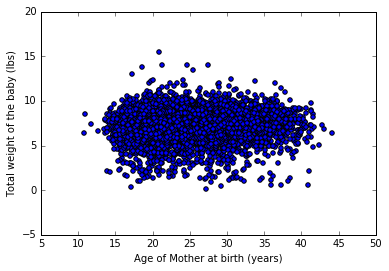

In [72]:
fig, ax = plt.subplots()
ax.scatter(df.agepreg, df.totalwgt_lb)
ax.set_ylabel("Total weight of the baby (lbs)")
ax.set_xlabel("Age of Mother at birth (years)")

That's a very blob-y looking scatter plot. It makes sens that we're also going to attempt to look at this with different statistics

Next, Plotting percentiles of birth weight vs mother's age. I'm going to assume that it's a plot like the one in the book with lines for the 25th, 50th and 75th percentile

To start, I'm going to divide the ages up into bins. 

In [73]:
bins = np.arange(10,44,5)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)

I'd be interested in knowing how to do this without thinkstats, but I couldn't figure it out. (I probably could have figured this out, but I felt that there were other things like the data exploration assignment that would better further my learning) As a result, this code is heavily borrowed from Allen's thinkstats book.

In [74]:
heights = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

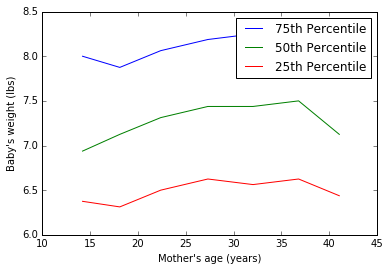

In [75]:
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth Percentile' % percent
    plt.plot(heights, weights, label=label)

plt.legend()
plt.xlabel("Mother's age (years)")
plt.ylabel("Baby's weight (lbs)")

Although it doesn't look like there is a great relationship between age and birthweight, it looks like as the mother's age increases, the birth weight increases as well, up until the mother is about 37 years old, and then it decreases sharply. 

Now, for the Pearson's correlation

In [78]:
#Just get a subset of the data. This makes stuff way easier to think about
df = df[["agepreg", "totalwgt_lb"]]


pearsons = thinkstats2.Corr(df.agepreg, df.totalwgt_lb)
pearsons

0.068833970354109097

Spearman's Correlation

In [80]:
spearmans = thinkstats2.SpearmanCorr(df.agepreg, df.totalwgt_lb)
spearmans

0.094610041096582262

Again, I'm not really sure how high a correlation it has to be for something to be correlated, but it doesn't seem like mothers age and birth weight are correlated. 

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

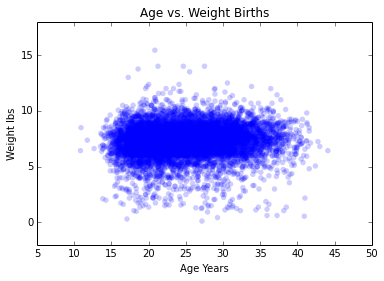

In [4]:
# Import and preset data
import nsfg
import math
import thinkstats2
import thinkplot
import numpy as np
import pandas

df = nsfg.ReadFemPreg()
preg = nsfg.ReadFemPreg()
weight = preg.totalwgt_lb
age = preg.agepreg

# Plot using thinkplot's scatter
thinkplot.Scatter(age, weight)
thinkplot.Show(title='Age vs. Weight Births',
              xlabel='Age Years',
              ylabel='Weight lbs',
              axis=[5,50,-2,18])


       Age vs Weight Percentile Plot


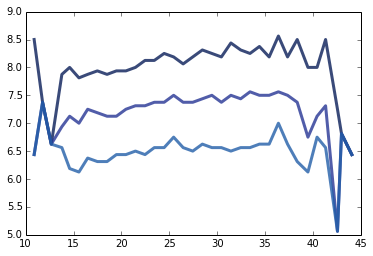

In [5]:
# Creating the Percentile Plot
df = df.dropna(subset=['agepreg','totalwgt_lb'])
bins = np.arange(5, 50, 1)
indices = np.digitize(df.agepreg,bins)
groups = df.groupby(indices)

mean_ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

print "       Age vs Weight Percentile Plot"

for percent in [75,50,25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_ages, weights, label=label)

In [23]:
#Pearson Correlation

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov


def Corr(xs, ys):
        
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    meanx, varx = np.mean(xs), np.var(xs)
    meany, vary = np.mean(ys), np.var(ys)
    
    
    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)
    return corr

weight = preg.totalwgt_lb
age = preg.agepreg

#weight = weight.dropna()
#age = age.dropna()

weight_list = []
age_list = []

for count in range(0,13592):
    if math.isnan(weight[count]) is False:
        if math.isnan(age[count]) is False:
            weight_list += [weight[count]]
            age_list += [age[count]]

Corr(age_list, weight_list)

0.06884659627091326

The Pearson Correlation value is 0.0688, indicating a 7% correlation in the positive direction. The magnitude is very weak, indicating not a strong correlation.

In [24]:
#Spearman's Correlation

def SpearmanCorr(xs, ys):
    xranks = pandas.Series(xs).rank()
    yranks = pandas.Series(ys).rank()
    return Corr(xranks, yranks)

SpearmanCorr(age_list, weight_list)

0.094623621559440027

The spearman correlation is 0.095, which is higher than the Pearson Correlation. The greater Spearman correlation value indicates that the correlation may not be strictly linear, and there may be outliars and skew messing with the pearson correlation.

Overall, from the data I could somewhat gather, I believe that there is no correlation whatsoever between age when giving birth and birth weight. The graphs show that the weights are linear throughout the age overall, and the percentile graphs are random.

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [65]:
import nsfg
import pandas
import math
import thinkstats2
import thinkplot
import numpy as np
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]



A scatter plot of birth weight versus mother’s age

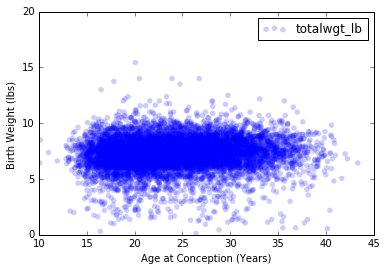

In [66]:
thinkplot.Scatter(live.agecon/100,live.totalwgt_lb)
thinkplot.Show(xlabel='Age at Conception (Years)',
               ylabel ='Birth Weight (lbs) ',
               axis=[10,45,0,20])


Percentiles of birth weight versus mother’s age (calculations)

In [67]:
live = live.dropna(subset=['agecon', 'totalwgt_lb'])
bins = np.arange(10, 45, 2)
indices = np.digitize(live.agecon/100, bins)
groups = live.groupby(indices)
agecons = [group.agecon.mean()/100 for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

Percentiles of birth weight versus mother’s age (plotting)

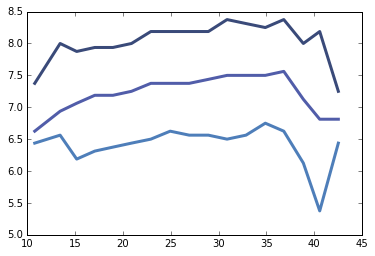

In [68]:
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(agecons, weights, label=label)

Pearson’s and Spearman’s correlations

In [69]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany =  np.mean(ys)
   
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)
    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xranks = pandas.Series(xs).rank()
    yranks = pandas.Series(ys).rank()
    return Corr(xranks, yranks)

print "Pearson Correlations: " + str(Corr(live.agecon,live.totalwgt_lb))
print "Spearman Correlations: " + str(SpearmanCorr(live.agecon,live.totalwgt_lb))

Pearson Correlations: 0.0643236327353
Spearman Correlations: 0.0913680035823


Characterization: There seems to be a small but noticable correlation between the mother's age and the child's birth weight. Based on the Pearson and Spearman Correlation coeffiecients it seems the correlation in somewhat nonlinear. This is supported by a visual analysis of the percentile graph. In the Percentile graph it appears that the child's birth weight increases the older the mother is until around age 37, at which point the child's birth weight decreases the older the mother is. 

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [2]:
import nsfg
import thinkplot
import thinkstats2
import numpy as np
import math
import pandas

df = nsfg.ReadFemPreg()

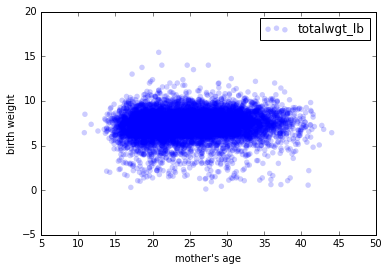

In [3]:
weights = df.totalwgt_lb
ages = df.agepreg
thinkplot.scatter(ages, weights)
thinkplot.config(xlabel='mother\'s age', ylabel='birth weight')

(2, 58)
(3, 1852)
(4, 2962)
(5, 2336)
(6, 1393)
(7, 401)
(8, 36)


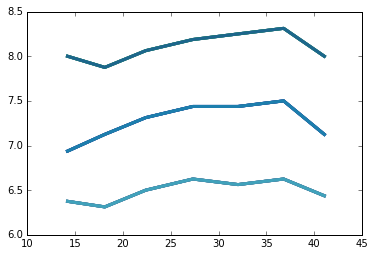

In [4]:
df_clean = df.dropna(subset=['totalwgt_lb', 'agepreg'])
bins = np.arange(5, 50, 5)
indices = np.digitize(df_clean.agepreg, bins)
groups = df_clean.groupby(indices)

for i, group in groups:
    print (i, len(group))
    
    ages = [group.agepreg.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
    
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

In [5]:
def pearsons(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    mean_x, mean_y = xs.mean(), ys.mean()
    var_x, var_y = xs.var(), ys.var()
    cov = np.dot(xs - mean_x, ys - mean_y) / len(xs)
    
    rho = cov / math.sqrt(var_x * var_y)
    
    return rho

pearsons(df_clean.agepreg, df_clean.totalwgt_lb)
# thinkstats2.Corr(ages, weights)

0.06883397035410907

In [6]:
def spearmans(xs, ys):
    xs = pandas.Series(xs)
    ys = pandas.Series(ys)
    
    return xs.corr(ys, method='spearman')

spearmans(df_clean.agepreg, df_clean.totalwgt_lb)

0.094610041096582262

The two correlation values are very close to zero, meaning that the mother's age and the total weight of the baby are not well correlated. Even when the correlation is performed by rank, there is no relationship between the parameters. Given one variable, it is virtually impossible to predict the other.

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

In [5]:
import nsfg
df = nsfg.ReadFemPreg()

In [27]:
import numpy as np
import pandas
import thinkstats2
import thinkplot
import math

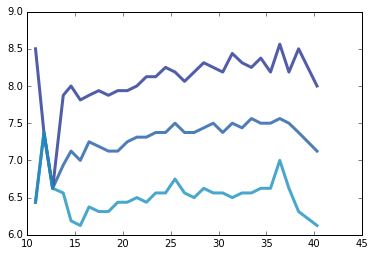

In [34]:

df = df.dropna(subset=['agepreg', 'totalwgt_lb'])
bins = np.arange(10, 40, 1)
indices = np.digitize(df['agepreg'], bins)
groups = df.groupby(indices)

for i, group in groups:
    agepreg = [group.agepreg.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
    
for percent in [75, 50, 25]:
    totalwgt_lb = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(agepreg, totalwgt_lb, label=label)

## Pearson’s Correlations

### Covariance Function

In [20]:
def Cov(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    xmean = xs.mean()
    ymean = ys.mean()
    
    return np.dot(xs-xmean, ys-ymean)/len(xs)


### Pearson's correlation function

In [21]:
def Corr(xs, ys):
    xvar = xs.var()
    yvar = ys.var()
    
    return Cov(xs, ys) / math.sqrt(xvar * yvar)

### Result

In [35]:
print "Pearson's correlation: ", thinkstats2.Corr(df.agepreg, df.totalwgt_lb)

Pearson's correlation:  0.0688339703541


## Spearman’s correlations

### Spearman’s correlation function

In [37]:
def SpearmanCorr(xs, ys):
    xranks = pandas.Series(xs).rank()
    yranks = pandas.Series(ys).rank()
    return Corr(xranks, xranks)

In [41]:
print "Spearman's correlation: ", thinkstats2.SpearmanCorr(df.agepreg, df.totalwgt_lb)

Spearman's correlation:  0.0946100410966


## Analysis

Both the Spearman's and Pearson's correlation indicates age of pregnancy and birth weight of babies are loosely related to each other. Spearman's is slightly higher than Pearson's, that may be cause by some outliers in the data as well as the possibility that the relation is not perfectly linear. 

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age.
Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


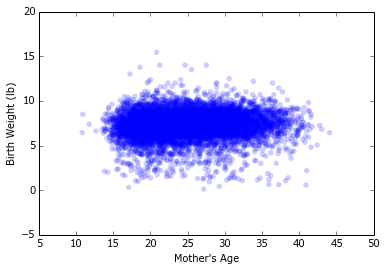

In [3]:
weight = df.totalwgt_lb
age = df.agepreg
thinkplot.Scatter(age, weight)
thinkplot.Show(xlabel='Mother\'s Age',
                   ylabel='Birth Weight (lb)')

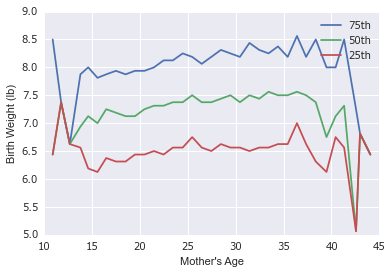

In [36]:
ndf = df.dropna(subset=['agepreg', 'totalwgt_lb'])
bins = numpy.arange(10, 45, 1)
indices = numpy.digitize(ndf.agepreg, bins)
groups = ndf.groupby(indices)
percentiles = [75, 50, 25]
ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
for percent in percentiles:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = str(percent) + 'th'
    thisplot = plt.plot(ages, weights)
plt.legend(['75th','50th','25th'])
plt.xlabel('Mother\'s Age')
plt.ylabel('Birth Weight (lb)')

In [35]:
print 'Pearsons:',thinkstats2.Corr(ndf.agepreg,ndf.totalwgt_lb)
print 'Spearmans:',thinkstats2.SpearmanCorr(ndf.agepreg,ndf.totalwgt_lb)

Pearsons: 0.0688339703541
Spearmans: 0.0946100410966


The pearson's correlation is very close to zero, which means that these two variable are not correlated.  Spearman's correlation is slightly higher than Pearson's, which is likely due to outliers in the 40-45 age range.

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

We will start by importing the necessary libraries

In [4]:
%matplotlib inline
import nsfg
import thinkstats2
import thinkplot
import numpy as np
from math import sqrt, pow

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Taking into account jitter and by using thinkplot's API we can 

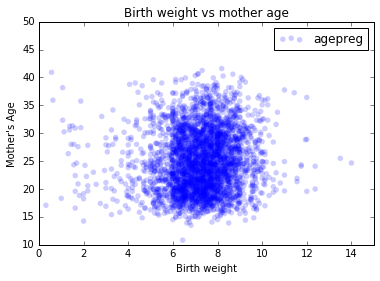

In [5]:
# define DataFrame
df = nsfg.ReadFemPreg()

# Random 5000 rows
sample = thinkstats2.SampleRows(df, 5000)

# Define birth_weight and age
birth_weight, age = sample.totalwgt_lb, sample.agepreg

weight_jitter = thinkstats2.Jitter(birth_weight, 0.5)
thinkplot.Scatter(birth_weight, age)
thinkplot.Show(title="Birth weight vs mother age",
               xlabel = "Birth weight",
               ylabel = "Mother's Age",
               axis = [0, 15, 10, 50])

Pearson Corr, 0.0688339703541
Spearman Corr, 0.0946100410966


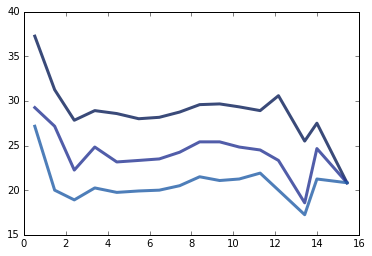

In [6]:
df = df.dropna(subset=['totalwgt_lb','agepreg'])
bins = np.arange(0,20,1)
indices = np.digitize(df.totalwgt_lb,bins)
groups = df.groupby(indices)

weights = [group.totalwgt_lb.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.agepreg) for i, group in groups]
    
for percent in [75, 50, 25]:
    ages = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(weights,ages,label=label)

print "Pearson Corr,", thinkstats2.Corr(df.totalwgt_lb, df.agepreg)
print "Spearman Corr,", thinkstats2.SpearmanCorr(df.totalwgt_lb, df.agepreg)

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

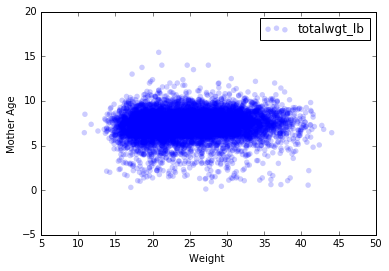

In [2]:
import nsfg
import thinkplot
import numpy as np
import thinkstats2


'''Scatter Plot of birth weight versus mother’s age'''
df = nsfg.ReadFemPreg()
df = df.dropna(subset=['totalwgt_lb','agepreg'])
thinkplot.Scatter(df.agepreg,df.totalwgt_lb)
thinkplot.Show(xlabel='Weight ',ylabel='Mother Age', alpha=0.2)



/home/zlan/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


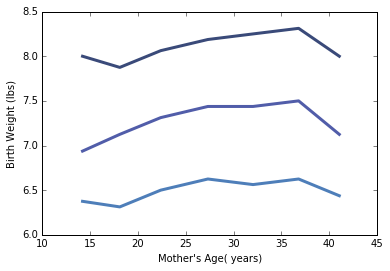

In [3]:
'''Percentiles of birth weight versus mother’s age'''
bins = np.arange(5, 50, 5)
indices = np.digitize(df.agepreg,bins)
groups = df.groupby(indices)
ages = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    thinkplot.Plot(ages, weights)

thinkplot.Show(xlabel="Mother's Age( years)",ylabel="Birth Weight (lbs)")

In [4]:
'''Parsons and Spearman correlations'''
print "Pearson's Correlation: ", thinkstats2.Corr(df.agepreg, df.totalwgt_lb)
print "Spearman's Rank: ", thinkstats2.SpearmanCorr(df.agepreg, df.totalwgt_lb)

Pearson's Correlation:  0.0688339703541
Spearman's Rank:  0.0946100410966


According to the Spearman's Rank values, the two variables have limited correlation. So we can say mother's age is a factor that contributes to child birth weight.

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

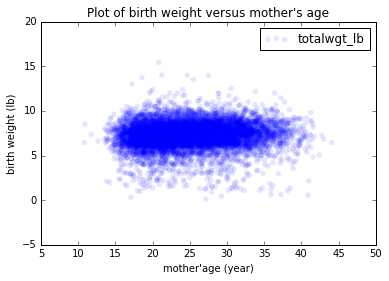

In [136]:
import nsfg
import thinkplot
import thinkstats2
import math
import numpy as np


df = nsfg.ReadFemPreg()

#drops rows with nan inputs to make the array equal length"
df = df[df.totalwgt_lb.notnull()]
df = df[df.agepreg.notnull()]

#df = df.dropna(subset =['df.totalwgt_lb', 'df.agepreg'])

wgt_birth = df.totalwgt_lb
age_mother = df.agepreg
    
thinkplot.Scatter(age_mother, wgt_birth, alpha = 0.1)
thinkplot.Show(xlabel = 'mother'+"'"+'age (year)', 
               ylabel = 'birth weight (lb)', 
               title='Plot of birth weight versus mother'+"'"+'s age')

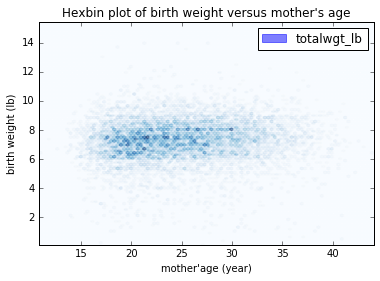

In [137]:
thinkplot.HexBin(age_mother, wgt_birth, alpha = 0.5) #Hexbin plot
thinkplot.Show(xlabel = 'mother'+"'"+'age (year)', 
               ylabel = 'birth weight (lb)', 
               title='Hexbin plot of birth weight versus mother'+"'"+'s age')

From the scatter plots, it seems like there isn't an obvious cause & effect relationship between the weight of the baby and the mother's age.

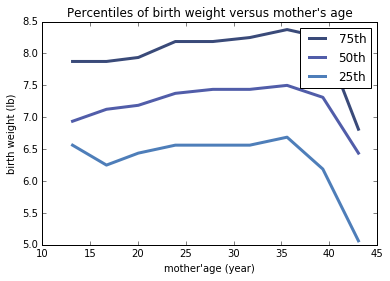

In [138]:
grouplength = 4
bins = np.arange (int(age_mother.min()), int(age_mother.max())+1, grouplength)
indices = np.digitize(df.agepreg, bins)
groups = df.groupby(indices)

age = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]
    
for percent in [75,50,25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(age, weights, label = label)
    
thinkplot.Show(xlabel = 'mother'+"'"+'age (year)', 
               ylabel = 'birth weight (lb)', 
               title='Percentiles of birth weight versus mother'+"'"+'s age')

When the grouplength is set to 1, there are a lot of noise but there seem like the birth eight increases with mother's age but declines after 36. There are a lot of jumps in percentile graph for mother's age in early 10s and above 40 but this might be due to limited number of people interviewed compared to those in other age (graph is less smooth)

When the grouplength is set to 4, we can see the trend much more clearly. The weight increases gradually till the age of ~35 (it might be other value because we grouped it by 4) but then decline sharply afterwards.

In [139]:
# print "The Covariance is", thinkstats2.Cov(age_mother, wgt_birth)
pearson_c = thinkstats2.Corr(age_mother, wgt_birth)
print "The Pearson's correlation is", pearson_c

The Pearson's correlation is 0.0688339703541


From the Pearson's correlation value, the birth weight and age of mother has very weak positive linear correlation. This might be due to the fact that the value is scattered around a very large area (from the scatter plot)

In [140]:
spearman_c = thinkstats2.SpearmanCorr(age_mother, wgt_birth)
print "The Spearman rank correlation is",  spearman_c

print "Difference in Spearman and Pearson correlation is ", spearman_c-pearson_c

The Spearman rank correlation is 0.0946100410966
Difference in Spearman and Pearson correlation is  0.0257760707425


The Spearman's correlation show that there is almost no correlation between the baby's weight and the mother's age. 
The difference shows the amount pearson's correlation is affected by nonlinearity, skewdness and outliers.

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

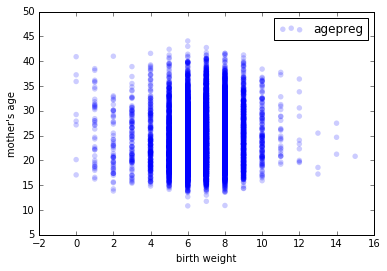

(1, 48)
(2, 151)
(3, 926)
(4, 5272)
(5, 2512)
(6, 158)
(7, 13)
(8, 4)


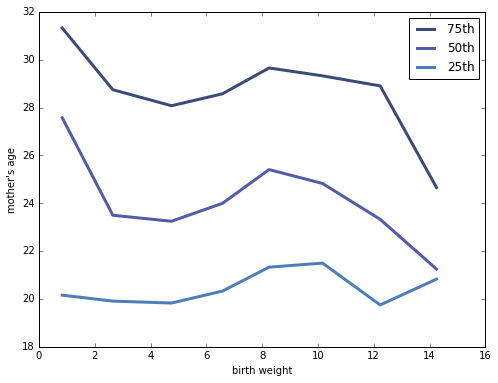

Pearson's correlation: 0.0689622017115
Spearman's correlation: 0.0945629753464


In [58]:
thinkplot.Scatter(df.birthwgt_lb, df.agepreg)
thinkplot.Show(xlabel='birth weight',
               ylabel="mother's age")


df = df.dropna(subset=['birthwgt_lb', 'agepreg'])
bins = np.arange(0, 16, 2)
indices = np.digitize(df.birthwgt_lb, bins)
groups = df.groupby(indices)

for i, group in groups:
    print(i, len(group))
    
weights = [group.birthwgt_lb.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.agepreg) for i, group in groups]
    
for percent in [75, 50, 25]:
    ages = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(weights, ages, label=label)
    
thinkplot.Show(xlabel='birth weight', ylabel="mother's age")

print "Pearson's correlation: " + str(thinkstats2.Corr(df.birthwgt_lb, df.agepreg))
print "Spearman's correlation: " + str(thinkstats2.SpearmanCorr(df.birthwgt_lb, df.agepreg))


Pearson's and Spearman's correlations suggest that there is a very small (perhaps negligible) positive correlation between these two variables. I think that some of the data I am using to determine these correlations is "screwy" to say the least, because I might have not processed the data for babies under five pounds correctly.

## Question 1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables? 

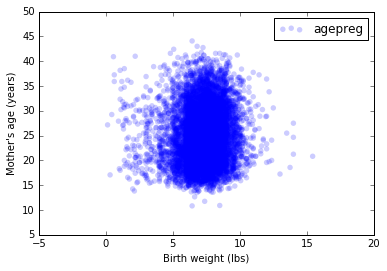

In [4]:
import nsfg
import thinkstats2
import thinkplot
df = nsfg.ReadFemPreg()
thinkplot.Scatter(df.totalwgt_lb, df.agepreg)
thinkplot.Show(xlabel="Birth weight (lbs)", ylabel="Mother's age (years)")

(1, 7)
(2, 40)
(3, 53)
(4, 98)
(5, 227)
(6, 692)
(7, 2214)
(8, 3031)
(9, 1881)
(10, 620)
(11, 132)
(12, 26)
(13, 10)
(14, 3)
(15, 3)
(16, 1)
[0.5178571428571429, 1.4671875, 2.4056603773584904, 3.3845663265306123, 4.43557268722467, 5.485368497109826, 6.469653342366757, 7.441087924777301, 8.39709595959596, 9.353225806451613, 10.287878787878787, 11.288461538461538, 12.1625, 13.416666666666666, 14.0, 15.4375]


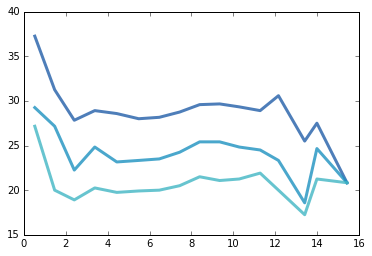

In [13]:
import numpy as np
df = df.dropna(subset=['totalwgt_lb', 'agepreg']) #get rid of columns with NaN
bins = np.arange(0, 20, 1) # create numpy bins
indices = np.digitize(df.totalwgt_lb, bins) #find bin index for each weight
groups = df.groupby(indices) 
for i, group in groups:
    print(i, len(group)) # go through each group, show how many in each category
    # so this is basically a homemade histogram / value counts with self defined bins?
    
birthweights = [group.totalwgt_lb.mean() for i, group in groups] # computes mean birth weight for each bin
print birthweights
cdfs = [thinkstats2.Cdf(group.agepreg) for i, group in groups]
for percent in [75, 50, 25]:
    ages = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(birthweights, ages, label=label)

This graph shows that between about 4lbs and 11lbs, there is almost no correlation between the data - horizontal lines mean a lack of correlation.  On the extremes, very few babies fall into thise bins (according to the value counts of bin sizes), so they're not really relevant to the correlative properties

In [16]:
print "Pearson correlation:", thinkstats2.Corr(df.totalwgt_lb, df.agepreg)
print "Spearman correlation:", thinkstats2.SpearmanCorr(df.totalwgt_lb, df.agepreg)

Pearson correlation: 0.0688339703541
Spearman correlation: 0.0946100410966


Both correlations are close to zero, confirming what we learned from the scatterplot and percentiles plot that there is little relationship between these two variables.  The Spearman correlation is slightly higher than the Pearson one, which might be the result of Spearman's number trying to mitigate the effects of outliers.  Looking at the scatterplot of the bins from the percentiles, we can see there are a couple, like the 1lb and 16lb points.  Treatment of outliers might account for the differences between the numbers, which is still pretty slight

Based on all this, I would definitely say that there is no relationship between these variables.  The weights of the babies seem clustered around 5-10 pounds, regardless of the age of the mother.